In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
car_prices = pd.read_csv('CarPrice_Assignment.csv')
car_prices.drop('car_ID', axis=1,inplace=True)
car_prices.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

**There is no null data!**

In [4]:
car_prices.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [5]:
car_prices.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
car_prices.describe(include = 'O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [7]:
CompanyName = car_prices['CarName'].apply(lambda x : x.split(' ')[0])
car_prices.insert(3,"CompanyName",CompanyName)

In [8]:
car_prices.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**First, let's fix the wrong names.**

In [9]:
car_prices = car_prices.replace(to_replace ="alfa-romero", value ="alfa-romeo") 
car_prices = car_prices.replace(to_replace ="maxda", value ="mazda") 
car_prices = car_prices.replace(to_replace ="porcshce", value ="porsche") 
car_prices = car_prices.replace(to_replace ="toyouta", value ="toyota") 
car_prices = car_prices.replace(to_replace ="vokswagen", value ="volkswagen") 
car_prices = car_prices.replace(to_replace ="vw", value ="volkswagen")
car_prices = car_prices.replace(to_replace ="Nissan", value ="nissan")

In [10]:
car_prices.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

**Let's visualize the distribution of car prices.**

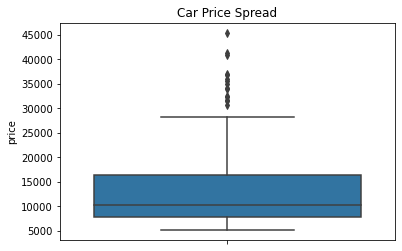

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [11]:
plt.title('Car Price Spread')
sns.boxplot(y=car_prices.price)
plt.show()
print(car_prices.price.describe())

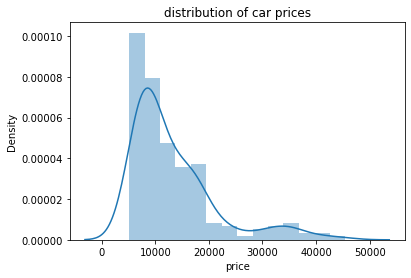

In [12]:
plt.title('distribution of car prices')
sns.distplot(car_prices.price)
plt.show()

**Vehicle prices are generally concentrated in the low price category.**

**Let's visualize how many vehicles are in which brand.**

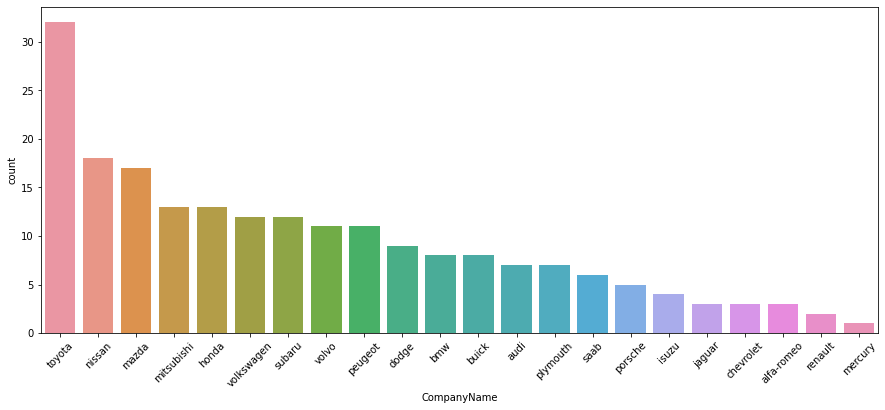

In [13]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 45)
data = car_prices['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=car_prices, order=data)

plt.show()

**The top selling brand was Toyota.**

**Let's visualize by fuel type.**

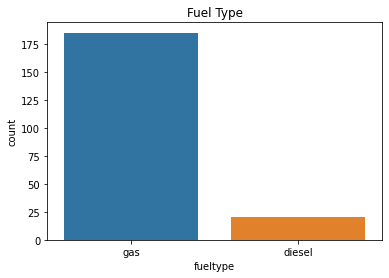

In [14]:
plt.title('Fuel Type')
order = car_prices['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=car_prices, order=order)

plt.show()

**Gas-fuelled vehicles are in the majority.**

**Let's visualize by vehicle type.**

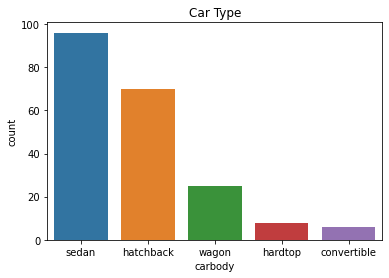

In [15]:
plt.title('Car Type')
order = car_prices['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=car_prices, order=order)

plt.show()

**The most sold vehicle type was the Sedan.**

### First, let's create a model without cleaning outliers and creating new features.

**Let's do Label Encoding to categorical data.**

In [16]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
car_prices['CompanyName']= label_encoder.fit_transform(car_prices['CompanyName'])
car_prices['CompanyName'].unique()

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9,  3, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [17]:
car_prices['carbody']= label_encoder.fit_transform(car_prices['carbody'])
car_prices['carbody'].unique()

array([0, 2, 3, 4, 1])

In [18]:
car_prices['fueltype']= label_encoder.fit_transform(car_prices['fueltype'])
car_prices['fueltype'].unique()

array([1, 0])

In [19]:
car_prices.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [20]:
car_prices['aspiration']= label_encoder.fit_transform(car_prices['aspiration'])
car_prices['aspiration'].unique()

array([0, 1])

In [21]:
car_prices.doornumber.unique()

array(['two', 'four'], dtype=object)

In [22]:
car_prices["doornumber"] = car_prices.doornumber.replace({'two':2, "four":4})

In [23]:
car_prices.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [24]:
car_prices['fuelsystem']= label_encoder.fit_transform(car_prices['fuelsystem'])
car_prices['fuelsystem'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [25]:
car_prices['enginelocation']= label_encoder.fit_transform(car_prices['enginelocation'])
car_prices['enginelocation'].unique()

array([0, 1])

In [26]:
car_prices['drivewheel']= label_encoder.fit_transform(car_prices['drivewheel'])
car_prices['drivewheel'].unique()

array([2, 1, 0])

In [27]:
car_prices['enginetype']= label_encoder.fit_transform(car_prices['enginetype'])
car_prices['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [28]:
car_prices['cylindernumber']= label_encoder.fit_transform(car_prices['cylindernumber'])
car_prices['cylindernumber'].unique()

array([2, 3, 1, 4, 5, 6, 0])

In [29]:
car_prices.drop("CarName", axis=1)
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    int32  
 3   CompanyName       205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

**Let's do the Linear Regression.**

In [30]:
Y = car_prices['price']
X = car_prices.drop(columns=['price','CarName'], axis=1)
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [31]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     67.48
Date:                Fri, 31 Dec 2021   Prob (F-statistic):           5.15e-77
Time:                        14:50:40   Log-Likelihood:                -1896.5
No. Observations:                 205   AIC:                             3843.
Df Residuals:                     180   BIC:                             3926.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.898e+04   1.73e+04     -3.985      0.000   -1.03e+05   -3.48e+04
symboling           54.1392    254.453      0.213      0.832    -447.956     556.234
fueltype          1697.5218   6493.460      0.261      0.794   -1.11e+04    1.45e+04
CompanyName       -226.2118     37.958     -5.959      0.000    -301.112    -151.311
aspiration         685.5914    891.076      0.769      0.443   -1072.706    2443.889
doornumber         342.7851    318.893      1.075      0.284    -286.464     972.034
carbody           -879.3197    366.301     -2.401      0.017   -1602.116    -156.524
drivewheel         795.6207    545.798      1.458      0.147    -281.365    1872.606
enginelocation    1.113e+04   2070.195      5.375      0.000    7043.106    1.52e+04
wheelbase          116.9926    103.223      1.133      0.259     -86.690     320.675
carlength          -10.9639     52.553     -0.209      0.835    -114.662      92.734
carwidth           587.4411    262.927      2.234      0.027      68.626    1106.256
carheight          266.8277    135.578      1.968      0.051      -0.698     534.354
curbweight           2.4712      1.580      1.564      0.119      -0.646       5.588
enginetype         146.2704    226.973      0.644      0.520    -301.600     594.141
cylindernumber     213.4304    355.638      0.600      0.549    -488.326     915.187
enginesize          84.2869     16.980      4.964      0.000      50.782     117.792
fuelsystem          81.7444    151.059      0.541      0.589    -216.329     379.818
boreratio         -681.4524   1108.658     -0.615      0.540   -2869.090    1506.185
stroke           -2768.4253    755.864     -3.663      0.000   -4259.920   -1276.931
compressionratio   230.9102    465.722      0.496      0.621    -688.068    1149.888
horsepower          26.9041     18.678      1.440      0.151      -9.952      63.760
peakrpm              1.3486      0.657      2.052      0.042       0.052       2.645
citympg            -87.6503    165.019     -0.531      0.596    -413.271     237.971
highwaympg         126.6016    145.491      0.870      0.385    -160.486     413.689
==============================================================================
Omnibus:                       39.128   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.327
Skew:                           0.601   Prob(JB):                     4.22e-40
Kurtosis:                       7.448   Cond. No.                     5.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+05. This might indicate that there are
strong multicollinearity or other numerical probl

**R Squared value is 0.90, Adj. R squared value is 0.88. Fine!**

**Let's try it out by removing a few features.**

In [32]:
Y = car_prices['price']
X = car_prices.drop(columns=['price','CarName','carlength','fuelsystem',
                             'compressionratio','symboling','doornumber','drivewheel','boreratio'], axis=1)
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [33]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     96.60
Date:                Fri, 31 Dec 2021   Prob (F-statistic):           6.69e-83
Time:                        14:50:40   Log-Likelihood:                -1898.7
No. Observations:                 205   AIC:                             3833.
Df Residuals:                     187   BIC:                             3893.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.718e+04   1.49e+04     -4.506      0.000   -9.66e+04   -3.78e+04
fueltype       -1745.5669   1096.543     -1.592      0.113   -3908.751     417.617
CompanyName     -222.6201     33.030     -6.740      0.000    -287.779    -157.461
aspiration       265.5527    772.770      0.344      0.732   -1258.914    1790.020
carbody         -855.4895    291.225     -2.938      0.004   -1429.997    -280.982
enginelocation  1.136e+04   1993.548      5.697      0.000    7424.585    1.53e+04
wheelbase        159.9679     82.891      1.930      0.055      -3.554     323.490
carwidth         549.9526    237.529      2.315      0.022      81.371    1018.534
carheight        227.0479    128.921      1.761      0.080     -27.279     481.375
curbweight         2.8125      1.504      1.870      0.063      -0.154       5.779
enginetype        92.2207    215.099      0.429      0.669    -332.112     516.553
cylindernumber   340.1555    320.321      1.062      0.290    -291.752     972.063
enginesize        81.9666     16.499      4.968      0.000      49.418     114.515
stroke         -2894.2487    706.459     -4.097      0.000   -4287.903   -1500.595
horsepower        29.6800     17.154      1.730      0.085      -4.161      63.521
peakrpm            1.5463      0.611      2.530      0.012       0.341       2.752
citympg         -102.9503    149.190     -0.690      0.491    -397.263     191.362
highwaympg       160.7411    140.475      1.144      0.254    -116.379     437.861
==============================================================================
Omnibus:                       28.455   Durbin-Watson:                   0.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.723
Skew:                           0.458   Prob(JB):                     1.34e-22
Kurtosis:                       6.310   Cond. No.                     4.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Adj. R-squared and F-statistic values increased.AIC and BIC values decreased.**

**Let's add the interactive states of the two variables.**

In [34]:
car_prices['enginetype_and_enginesize'] = car_prices.enginetype * car_prices.enginesize

In [35]:
Y = car_prices['price']
X = car_prices.drop(columns=['price','CarName','carlength','fuelsystem','compressionratio','symboling','doornumber','drivewheel','boreratio'], axis=1)
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [36]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     93.47
Date:                Fri, 31 Dec 2021   Prob (F-statistic):           5.76e-83
Time:                        14:50:40   Log-Likelihood:                -1896.0
No. Observations:                 205   AIC:                             3830.
Df Residuals:                     186   BIC:                             3893.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -7.114e+04   1.49e+04     -4.788      0.000      -1e+05   -4.18e+04
fueltype                  -1812.0874   1085.363     -1.670      0.097   -3953.291     329.116
CompanyName                -222.2284     32.681     -6.800      0.000    -286.702    -157.755
aspiration                  649.3143    783.571      0.829      0.408    -896.515    2195.144
carbody                    -914.0752    289.332     -3.159      0.002   -1484.870    -343.280
enginelocation             1.069e+04   1994.922      5.358      0.000    6753.532    1.46e+04
wheelbase                   143.7233     82.335      1.746      0.083     -18.708     306.155
carwidth                    523.0941    235.325      2.223      0.027      58.844     987.344
carheight                   289.9183    130.612      2.220      0.028      32.248     547.589
curbweight                    2.2996      1.505      1.528      0.128      -0.670       5.269
enginetype                 1384.9218    615.210      2.251      0.026     171.235    2598.609
cylindernumber              124.2920    331.269      0.375      0.708    -529.236     777.820
enginesize                  124.6514     25.095      4.967      0.000      75.143     174.159
stroke                    -3498.0758    749.193     -4.669      0.000   -4976.085   -2020.067
horsepower                   25.4625     17.077      1.491      0.138      -8.227      59.152
peakrpm                       1.9207      0.627      3.062      0.003       0.683       3.158
citympg                     -95.8360    147.648     -0.649      0.517    -387.116     195.444
highwaympg                  162.8032    138.994      1.171      0.243    -111.404     437.011
enginetype_and_enginesize    -8.3222      3.716     -2.240      0.026     -15.653      -0.991
==============================================================================
Omnibus:                       30.211   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.636
Skew:                           0.549   Prob(JB):                     2.82e-21
Kurtosis:                       6.142   Cond. No.                     4.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**When the interaction of engine type and engine size was added, an improvement in the performance of the model was observed.**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.08, random_state = 0)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 188
Test kümesindeki gözlem sayısı   : 17


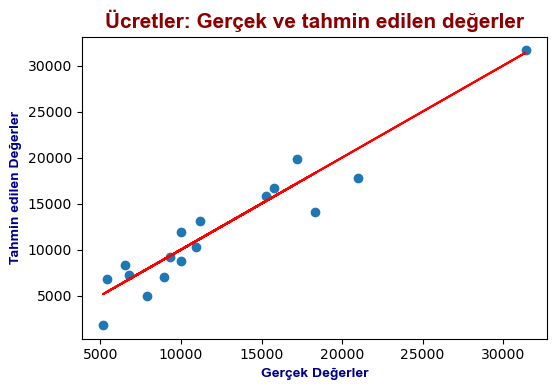

Ortalama Mutlak Hata (MAE)        : 1727.5806629649069
Ortalama Kare Hata (MSE)          : 4362430.666485885
Kök Ortalama Kare Hata (RMSE)     : 2088.643259746835
Ortalama Mutlak Yüzde Hata (MAPE) : 17.733883739662616


In [38]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

**Let's apply Ridge Regression and see if the model improves.**

In [39]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=1) 
ridgeregr.fit(X_train, y_train)

y_egitim_tahmini = ridgeregr.predict(X_train)
y_test_tahmini = ridgeregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.8998304840181204
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.8208678247709846
Ortalama Mutlak Hata (MAE)        : 2296.7303007161854
Ortalama Kare Hata (MSE)          : 7765429.103703673
Kök Ortalama Kare Hata (RMSE)     : 2786.651952380073
Ortalama Mutlak Yüzde Hata (MAPE) : 22.01948542958992


**Let's apply Lasso Regression and see if the model improves.**

In [40]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=0.01) 
lassoregr.fit(X_train, y_train)

y_egitim_tahmini = lassoregr.predict(X_train)
y_test_tahmini = lassoregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.9017051781996782
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.8432769199745482
Ortalama Mutlak Hata (MAE)        : 2135.1617714214904
Ortalama Kare Hata (MSE)          : 6793988.65835127
Kök Ortalama Kare Hata (RMSE)     : 2606.5280850877607
Ortalama Mutlak Yüzde Hata (MAPE) : 21.277680928259663


**Performed well with both regression models. But MAPE values slightly increased.**

### Let's do the same steps by deleting the outliers in the "price" property. 

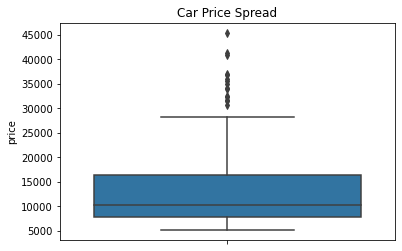

In [41]:
plt.title('Car Price Spread')
sns.boxplot(y=car_prices.price)
plt.show()

In [42]:
q75, q25 = np.percentile(car_prices["price"], [75 ,25])
IQR = q75 - q25

threshold_values=[]
for threshold_value in np.arange(1,5,0.5):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    outlier_value_number = len((np.where((car_prices["price"].dropna() > max_value)| (car_prices["price"].dropna() < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1.0,18
1,1.5,15
2,2.0,10
3,2.5,3
4,3.0,1
5,3.5,0
6,4.0,0
7,4.5,0


**Let's take the threshold value of 1.**

In [43]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1* IQR
    upper_bound = Q3 + 1 * IQR
    ls = df.index[(car_prices[ft] < lower_bound) | (car_prices[ft]>upper_bound)]
    return ls
index_list = []
for feature in ['price']:
    index_list.extend(outliers(car_prices, feature))
print(len(index_list))
print(index_list)    

18
[15, 16, 17, 47, 48, 49, 67, 68, 69, 70, 71, 72, 73, 74, 126, 127, 128, 129]


In [44]:
def remove(car_prices , ls):
    ls = sorted(set(ls))
    car_prices=car_prices.drop(ls)
    return car_prices
car_prices = remove(car_prices , index_list)

In [45]:
car_prices.shape

(187, 27)

In [46]:
car_prices

,symboling,CarName,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,enginetype_and_enginesize
0,3,alfa-romero giulia,1,0,0,2,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,alfa-romero stelvio,1,0,0,2,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,alfa-romero Quadrifoglio,1,0,0,2,2,2,0,94.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,760
3,2,audi 100 ls,1,1,0,4,3,1,0,99.8,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,327
4,2,audi 100ls,1,1,0,4,3,0,0,99.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),1,21,0,4,3,2,0,109.1,...,5,3.78,3.15,9.5,114,5400,23,28,16845.0,423
201,-1,volvo 144ea,1,21,1,4,3,2,0,109.1,...,5,3.78,3.15,8.7,160,5300,19,25,19045.0,423
202,-1,volvo 244dl,1,21,0,4,3,2,0,109.1,...,5,3.58,2.87,8.8,134,5500,18,23,21485.0,865
203,-1,volvo 246,0,21,1,4,3,2,0,109.1,...,3,3.01,3.40,23.0,106,4800,26,27,22470.0,435


In [47]:
Y = car_prices['price']
X = car_prices.drop(columns=['price','CarName'], axis=1)
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [48]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     38.47
Date:                Fri, 31 Dec 2021   Prob (F-statistic):           1.15e-54
Time:                        14:50:40   Log-Likelihood:                -1663.2
No. Observations:                 187   AIC:                             3376.
Df Residuals:                     162   BIC:                             3457.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -6.789e+04   1.27e+04     -5.350      0.000   -9.29e+04   -4.28e+04
symboling                   -26.8705    194.047     -0.138      0.890    -410.058     356.317
fueltype                    1.82e+04   5057.798      3.598      0.000    8209.083    2.82e+04
CompanyName                -182.1513     27.759     -6.562      0.000    -236.967    -127.336
aspiration                 1874.2384    730.905      2.564      0.011     430.909    3317.568
doornumber                  334.9352    237.367      1.411      0.160    -133.798     803.668
carbody                    -345.2070    278.834     -1.238      0.217    -895.826     205.412
drivewheel                  958.2926    423.158      2.265      0.025     122.676    1793.910
enginelocation             1.674e-10   4.73e-11      3.538      0.001     7.4e-11    2.61e-10
wheelbase                    53.1158     83.302      0.638      0.525    -111.382     217.614
carlength                   -45.9402     40.376     -1.138      0.257    -125.672      33.792
carwidth                    547.4477    195.487      2.800      0.006     161.416     933.479
carheight                   193.3647    105.615      1.831      0.069     -15.195     401.925
curbweight                    3.0007      1.244      2.412      0.017       0.544       5.457
enginetype                  508.2487    771.300      0.659      0.511   -1014.850    2031.347
cylindernumber              -13.9532    373.993     -0.037      0.970    -752.484     724.578
enginesize                   28.8284     28.628      1.007      0.315     -27.704      85.360
fuelsystem                  316.2926    114.324      2.767      0.006      90.536     542.049
boreratio                  -497.5768    823.241     -0.604      0.546   -2123.244    1128.090
stroke                    -1950.8990    595.401     -3.277      0.001   -3126.647    -775.151
compressionratio           1456.0492    368.758      3.949      0.000     727.856    2184.242
horsepower                   34.0441     17.598      1.935      0.055      -0.708      68.796
peakrpm                      -0.1967      0.526     -0.374      0.709      -1.235       0.842
citympg                    -277.8658    121.623     -2.285      0.024    -518.036     -37.696
highwaympg                  189.4574    107.701      1.759      0.080     -23.221     402.136
enginetype_and_enginesize    -3.6649      5.283     -0.694      0.489     -14.096       6.767
==============================================================================
Omnibus:                        5.392   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                4.983
Skew:                           0.361   Prob(JB):                       0.0828
Kurtosis:                       3.343   C

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.08, random_state = 0)

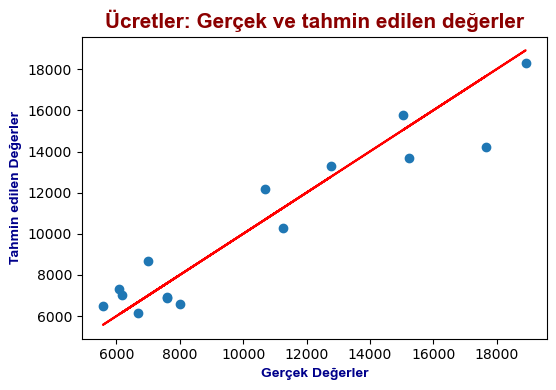

Ortalama Mutlak Hata (MAE)        : 1160.9796914874137
Ortalama Kare Hata (MSE)          : 1863476.855467293
Kök Ortalama Kare Hata (RMSE)     : 1365.0922516325747
Ortalama Mutlak Yüzde Hata (MAPE) : 12.238500475954957


In [50]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

**MAPE has dropped seriously.**

In [51]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=1) 
ridgeregr.fit(X_train, y_train)

y_egitim_tahmini = ridgeregr.predict(X_train)
y_test_tahmini = ridgeregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.8389524269107074
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.8505122223946872
Ortalama Mutlak Hata (MAE)        : 1330.7903074676235
Ortalama Kare Hata (MSE)          : 2822396.0097380774
Kök Ortalama Kare Hata (RMSE)     : 1679.998812421627
Ortalama Mutlak Yüzde Hata (MAPE) : 13.608841508182639


In [52]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=0.01) 
lassoregr.fit(X_train, y_train)

y_egitim_tahmini = lassoregr.predict(X_train)
y_test_tahmini = lassoregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.8474021064753001
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.8688911764828702
Ortalama Mutlak Hata (MAE)        : 1276.2996406857612
Ortalama Kare Hata (MSE)          : 2475393.1476137596
Kök Ortalama Kare Hata (RMSE)     : 1573.338217807525
Ortalama Mutlak Yüzde Hata (MAPE) : 13.157814681029587


### Before cleaning out the outliers;

**Linear Regression MAPE:** 17.73

**Ridge Regression MAPE:** 22.019

**Lasso Regression MAPE:** 21.277


### After cleaning out the outliers;

**Linear Regression MAPE:** 12.238

**Ridge Regression MAPE:** 13.608

**Lasso Regression MAPE:** 13.157


**Let's delete the outliers not only from the target variable, but also from the important features and look at the results again.**

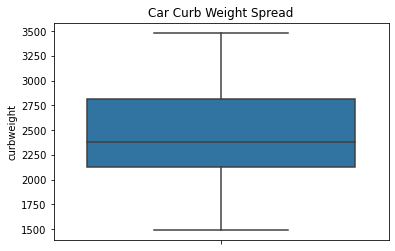

In [53]:
plt.title('Car Curb Weight Spread')
sns.boxplot(y=car_prices.curbweight)
plt.show()

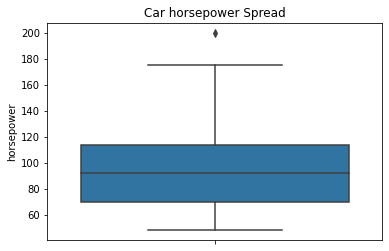

In [54]:
plt.title('Car horsepower Spread')
sns.boxplot(y=car_prices.horsepower)
plt.show()

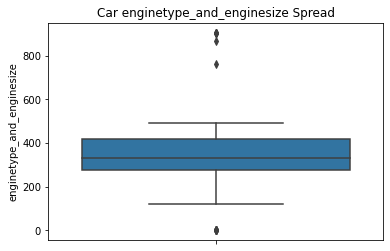

In [55]:
plt.title('Car enginetype_and_enginesize Spread')
sns.boxplot(y=car_prices.enginetype_and_enginesize)
plt.show()

**Let's look at the results again by clearing out the outliers here.**

In [56]:
#q75, q25 = np.percentile(car_prices["enginetype_and_enginesize"], [75 ,25])
#IQR = q75 - q25

#threshold_values=[]
#for threshold_value in np.arange(1,5,0.5):
 #   min_value = q25 - (IQR*threshold_value)
  #  max_value = q75 + (IQR*threshold_value)
   # outlier_value_number = len((np.where((car_prices["enginetype_and_enginesize"].dropna() > max_value)| (car_prices["enginetype_and_enginesize"].dropna() < min_value))[0]))
   # threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
#pd.DataFrame(threshold_values)

**Let's take the threshold value of 2.**

In [57]:
#def outliers(df, ft):
#    Q1 = df[ft].quantile(0.25)
#    Q3 = df[ft].quantile(0.75)
#    IQR = Q3 - Q1
    
#    lower_bound = Q1 - 2* IQR
#   upper_bound = Q3 + 2 * IQR
#    ls = df.index[(car_prices[ft] < lower_bound) | (car_prices[ft]>upper_bound)]
#    return ls
#index_list = []
#for feature in ['enginetype_and_enginesize']:
#    index_list.extend(outliers(car_prices, feature))
#print(len(index_list))
#print(index_list)

In [58]:
#def remove(car_prices , ls):
#    ls = sorted(set(ls))
#    car_prices=car_prices.drop(ls)
#    return car_prices
#car_prices = remove(car_prices , index_list)

In [59]:
#car_prices.shape

In [60]:
#Y = car_prices['price']
#X = car_prices.drop(columns=['price','CarName'], axis=1)
#lrm = linear_model.LinearRegression()
#lrm.fit(X, Y)

In [61]:
#X = sm.add_constant(X)
#results = sm.OLS(Y, X).fit()
#results.summary()

In [62]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.08, random_state = 0)

In [63]:
#X_test = sm.add_constant(X_test)

#y_preds = results.predict(X_test)


#baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
#eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
#plt.figure(dpi = 100)

#plt.scatter(y_test, y_preds)
#plt.plot(y_test, y_test, color="red")
#plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
#plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
#plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
#plt.show()

#print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
#print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
#print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
#print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [64]:
#from sklearn.linear_model import Ridge

#ridgeregr = Ridge(alpha=1) 
#ridgeregr.fit(X_train, y_train)

#y_egitim_tahmini = ridgeregr.predict(X_train)
#y_test_tahmini = ridgeregr.predict(X_test)

#print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(X_train, y_train)))
#print("-----Test kümesi istatistikleri---")
#print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))
#print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
#print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
#print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
#print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

In [65]:
#from sklearn.linear_model import Lasso

#lassoregr = Lasso(alpha=0.01) 
#lassoregr.fit(X_train, y_train)

#y_egitim_tahmini = lassoregr.predict(X_train)
#y_test_tahmini = lassoregr.predict(X_test)

#print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))
#print("-----Test kümesi istatistikleri---")
#print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
#print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
#print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
#print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
#print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

### Before cleaning out the outliers;


**Linear Regression MAPE:** 17.73

**Ridge Regression MAPE:** 22.019

**Lasso Regression MAPE:** 21.277


### After cleaning out the outliers from 'price';

**Linear Regression MAPE:** 12.238

**Ridge Regression MAPE:** 13.608

**Lasso Regression MAPE:** 13.157

### After cleaning out the outliers from 'price' and 'enginetype_and_enginesize';

**Linear Regression MAPE:** 13.849

**Ridge Regression MAPE:** 16.376

**Lasso Regression MAPE:** 16.733


**The values got better after cleaning out the outliers.**

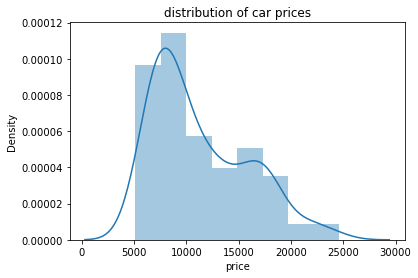

In [66]:
plt.title('distribution of car prices')
sns.distplot(car_prices.price)
plt.show()

**Now it has a more normal distribution.**

**When we deleted outliers from both features, our model performed poorly. Therefore, let's continue without clearing outliers from the engine_size_and_engine_type property. I will put those actions I have done in the comment line.**

In [67]:
car_prices.shape

(187, 27)

## Let's apply KNN algorithm to the model.

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn import model_selection

y = car_prices['price']
X = car_prices.drop(columns=['price','CarName'], axis=1)

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [69]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [70]:
knn_model

KNeighborsRegressor()

In [71]:
knn_model.n_neighbors

5

In [72]:
#python bize 5 komşu atadı.

In [73]:
knn_model.effective_metric_

'euclidean'

In [74]:
#metrik olarak Euclidean atadı.

In [75]:
y_pred= knn_model.predict(X_test)

In [76]:
np.sqrt(mean_squared_error(y_test,y_pred))  #test hatamızı hesaplıyoruz.

2590.068796993218

In [77]:
#farklı k değerlerine göre rmse değişimine bakalım.
RMSE =[]

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
    y_pred=knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    RMSE.append(rmse)
    print("k=",k,"için RMSE değeri:",rmse)

k= 1 için RMSE değeri: 297.26845731474054
k= 2 için RMSE değeri: 1256.5856622566387
k= 3 için RMSE değeri: 1492.6458877086268
k= 4 için RMSE değeri: 1646.5718520318399
k= 5 için RMSE değeri: 1817.0874323658466
k= 6 için RMSE değeri: 1844.8237659090928
k= 7 için RMSE değeri: 1925.5431277788298
k= 8 için RMSE değeri: 2006.7277006619897
k= 9 için RMSE değeri: 2066.555141033418
k= 10 için RMSE değeri: 2068.2823175368467


**The standard deviation of the values is too high. We need to validate.**

**Let's do cross validation and find optimum k value.**

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
knn_params = {'n_neighbors': np.arange(1,20,1)}

In [80]:
knn = KNeighborsRegressor()

In [81]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10)

In [82]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [83]:
knn_cv_model.best_params_["n_neighbors"]

4

**The optimum k value is 4.**

In [84]:
from sklearn.model_selection import GridSearchCV, cross_val_score
RMSE=[]
RMSE_CV=[]

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
    y_pred=knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    rmse_cv=np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10,
                                      scoring="neg_mean_squared_error").mean())
    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k=",k,"için RMSE değeri:{:.2f}".format(rmse)," ______ ", "RMSE_CV değeri:{:.2f}".format(rmse_cv))

k= 1 için RMSE değeri:297.27  ______  RMSE_CV değeri:2634.03
k= 2 için RMSE değeri:1256.59  ______  RMSE_CV değeri:2346.77
k= 3 için RMSE değeri:1492.65  ______  RMSE_CV değeri:2322.96
k= 4 için RMSE değeri:1646.57  ______  RMSE_CV değeri:2303.05
k= 5 için RMSE değeri:1817.09  ______  RMSE_CV değeri:2325.10
k= 6 için RMSE değeri:1844.82  ______  RMSE_CV değeri:2317.73
k= 7 için RMSE değeri:1925.54  ______  RMSE_CV değeri:2331.52
k= 8 için RMSE değeri:2006.73  ______  RMSE_CV değeri:2327.85
k= 9 için RMSE değeri:2066.56  ______  RMSE_CV değeri:2319.70
k= 10 için RMSE değeri:2068.28  ______  RMSE_CV değeri:2346.32


**Standard deviation dropped and it became more logical.**

In [85]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [86]:
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test)))

2594.307259414351

**We see that the rmse value has increased slightly.**

In [87]:
predictions = knn_cv_model.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'unit.')
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 1773.72 unit.
Accuracy: 83.655 %.


## Decision Tree Algorithm

In [88]:
from sklearn.tree import DecisionTreeRegressor

y = car_prices['price']
X = car_prices.drop(columns=['price','CarName'], axis=1)

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [89]:
dt_reg = DecisionTreeRegressor(max_depth=4)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [90]:
from sklearn.metrics import mean_squared_error as MSE
y_tahmin = dt_reg.predict(X_test)
mse_ka = MSE(y_tahmin, y_test)
rmse_ka = mse_ka**(1/2)

# Print rmse_dt
print("Karar Ağacının RMSE değeri : {:.2f}".format(rmse_ka))

Karar Ağacının RMSE değeri : 2155.54


In [91]:
predictions = dt_reg.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 1685.36
Accuracy: 84.324 %.


**Let's try again by changing the maximum depth.**

In [92]:
dt_reg = DecisionTreeRegressor(max_depth=6)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [93]:
from sklearn.metrics import mean_squared_error as MSE
y_tahmin = dt_reg.predict(X_test)
mse_ka = MSE(y_tahmin, y_test)
rmse_ka = mse_ka**(1/2)

# Print rmse_dt
print("Karar Ağacının RMSE değeri : {:.2f}".format(rmse_ka))

Karar Ağacının RMSE değeri : 2074.68


In [94]:
predictions = dt_reg.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 1519.74
Accuracy: 85.484 %.


**As the decision tree max depth increased, rmse and mae decreased and accuracy increased.Let's try to decrease max_depth.**

In [95]:
dt_reg = DecisionTreeRegressor(max_depth=3)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [96]:
from sklearn.metrics import mean_squared_error as MSE
y_tahmin2 = dt_reg.predict(X_test)
mse_ka2 = MSE(y_tahmin2, y_test)
rmse_ka2 = mse_ka2**(1/2)

# Print rmse_dt
print("Karar Ağacının RMSE değeri : {:.2f}".format(rmse_ka2))

Karar Ağacının RMSE değeri : 2478.91


In [97]:
predictions = dt_reg.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 1817.57
Accuracy: 83.271 %.


**best scores were achieved when max_depth=6**

In [98]:
dt_reg.min_samples_split  #örneklem sayısını 2 kullanıyormuş.Bunu arttırarak ne oluyor görelim.

2

In [99]:
dt_reg = DecisionTreeRegressor(max_depth=6,min_samples_split=5)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=5)

In [100]:
from sklearn.metrics import mean_squared_error as MSE
y_tahmin = dt_reg.predict(X_test)
mse_ka = MSE(y_tahmin, y_test)
rmse_ka = mse_ka**(1/2)

# Print rmse_dt
print("Karar Ağacının RMSE değeri : {:.2f}".format(rmse_ka))

Karar Ağacının RMSE değeri : 2087.76


**RMSE value decreased.**

In [101]:
dt_reg.min_samples_leaf

1

In [102]:
dt_reg = DecisionTreeRegressor(max_depth=6,min_samples_split=5,min_samples_leaf=3)

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=5)

In [103]:
from sklearn.metrics import mean_squared_error as MSE
y_tahmin = dt_reg.predict(X_test)
mse_ka = MSE(y_tahmin, y_test)
rmse_ka = mse_ka**(1/2)

# Print rmse_dt
print("Karar Ağacının RMSE değeri : {:.8f}".format(rmse_ka))

Karar Ağacının RMSE değeri : 2478.68568815


In [104]:
predictions = dt_reg.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 1920.99
Accuracy: 82.578 %.


**RMSE value increased.**

**When we look at the results, we reached the optimum accuracy value when max_depth=6 , min_samples_split =2, min_samples_leaf=1. We had the lowest RMSE and MAE values.**

In [105]:
#TEKRAR OPTİMUM OLAN DEĞERLERİ ÇALIŞTIRIP AĞAÇ ÇİZDİRELİM.
dt_reg = DecisionTreeRegressor(max_depth=6)

dt_reg.fit(X_train, y_train)

y_tahmin = dt_reg.predict(X_test)
mse_ka = MSE(y_tahmin, y_test)
rmse_ka = mse_ka**(1/2)

predictions = dt_reg.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)

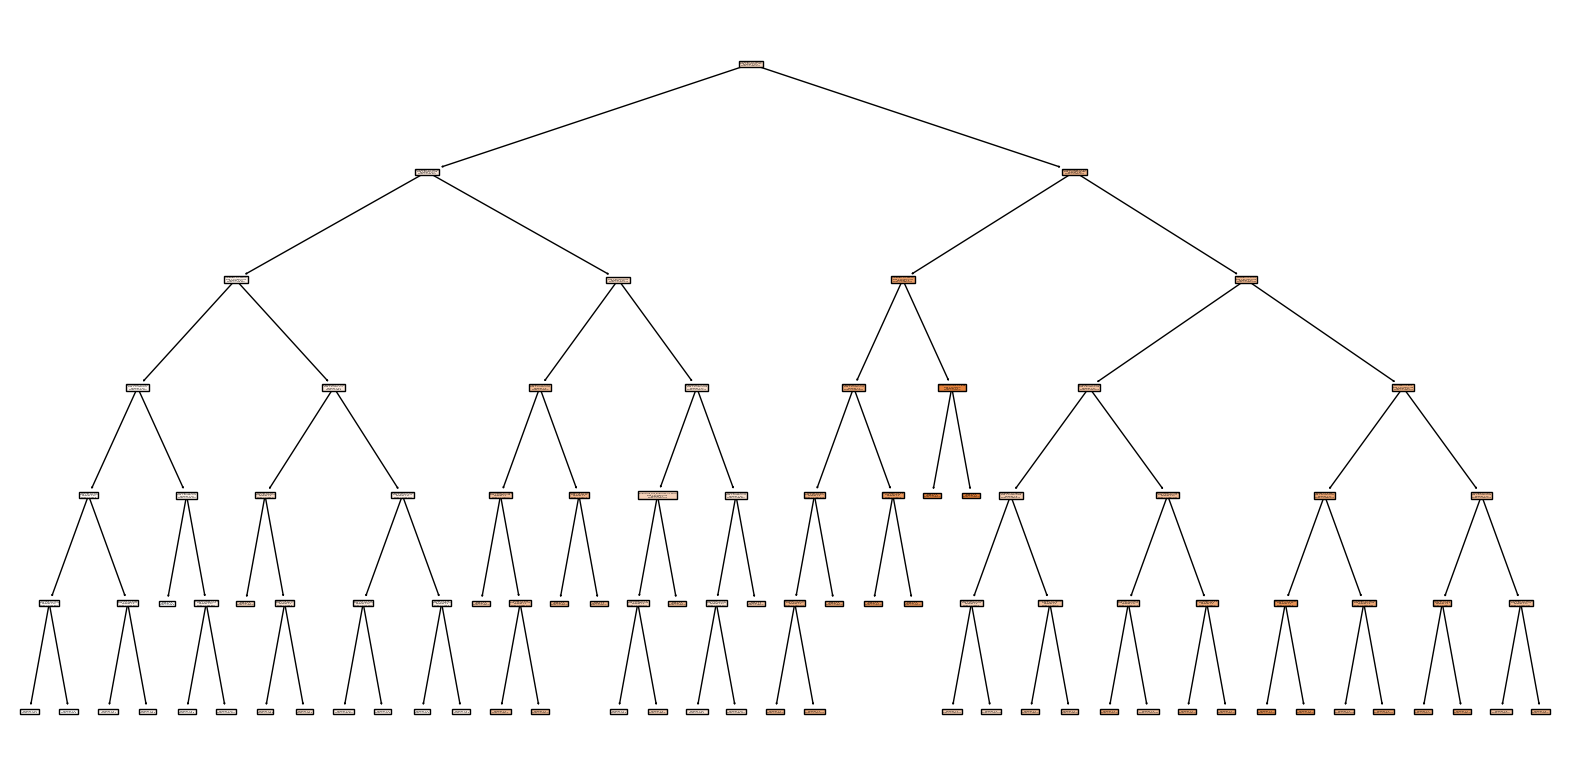

In [106]:
from sklearn import tree
plt.figure(figsize=(20, 10), dpi=100)
tree.plot_tree(decision_tree = dt_reg,
               feature_names=X.columns,
               class_names=['kucuk', 'buyuk'],
               filled = True
              )
plt.show()

## Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

y = car_prices['price']
X = car_prices.drop(columns=['price','CarName'], axis=1)

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [108]:
rastgele_orman = RandomForestRegressor(n_estimators=25, random_state=2)
rastgele_orman.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [109]:
from sklearn.metrics import mean_squared_error as MSE
y_tahmin = rastgele_orman.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Rastgele Orman): {:.2f}".format(rmse_test))

RMSE değeri (Rastgele Orman): 2185.05


In [110]:
predictions = rastgele_orman.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 1464.29
Accuracy: 86.345 %.


**Let's apply Random Search.**

In [111]:
rf = RandomForestRegressor(random_state = 35)

from sklearn.model_selection import RandomizedSearchCV

In [112]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

In [113]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,

param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X,y)

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'n_estimators': 19, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}  



**Best Parameters:** 

**'n_estimators':** 19, 

**'min_samples_split':** 6,

**'min_samples_leaf':** 4, 

**'max_features':** 'sqrt', 

**'max_depth':** 80, 

**'bootstrap':** False

In [114]:
from sklearn.metrics import mean_squared_error as MSE
y_tahmin = rf_random.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Rastgele Orman): {:.2f}".format(rmse_test))

RMSE değeri (Rastgele Orman): 1303.69


In [115]:
predictions = rf_random.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 867.14
Accuracy: 91.945 %.


**The accuracy of the model increased to 91.9% !**

**Let's look at the degree of importance of the features.**

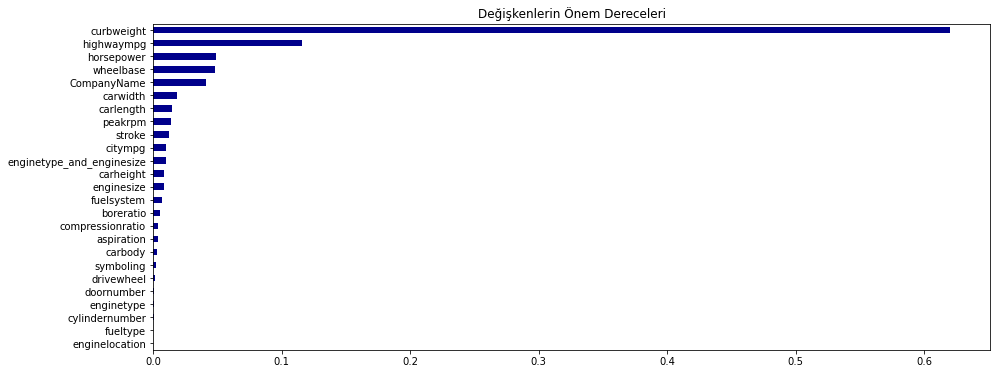

In [116]:
onem_dereceleri = pd.Series(data=rastgele_orman.feature_importances_,
                        index= X_train.columns)

onem_dereceleri_sirali = onem_dereceleri.sort_values()

plt.figure(figsize=(15,6))
onem_dereceleri_sirali.plot(kind='barh', color='darkblue')
plt.title('Değişkenlerin Önem Dereceleri')
plt.show()

**The most important variable for the model is the curb weight.**

## Support Vector Machines (SVM)

In [117]:
from sklearn.svm import SVR
y = car_prices['price']
X = car_prices.drop(columns=['price','CarName'], axis=1)

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [118]:
svr_reg = SVR(kernel='linear', C=1)
svr_reg.fit(X_train, y_train)
y_tahmin = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Kernel = linear): {:.2f}".format(rmse_test))

RMSE değeri (Kernel = linear): 2185.63


In [119]:
predictions = svr_reg.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 1529.9
Accuracy: 85.748 %.


**Now let's look at the results again by changing a few parameters.**

**Let's change the kernel values.**

In [120]:
en_iyi_parametreler = {}

In [121]:
kernel_listesi = ['linear', 'rbf', 'poly']

for kernel in kernel_listesi:
    svr_reg = SVR(kernel=kernel, C=1)
    svr_reg.fit(X_train, y_train)
    y_tahmin = svr_reg.predict(X_test)
    rmse_test = MSE(y_test, y_tahmin)**(1/2)
    print("RMSE değeri (Kernel = {}): {:.2f}".format(kernel,rmse_test))
    
    predictions = svr_reg.predict(X_test)
    errors = abs(predictions - y_test)
    print('{} Mean Absolute Error:'.format(kernel), round(np.mean(errors), 2))
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('{} Accuracy:'.format(kernel), round(accuracy, 3), '%.')
    print("------------------------------------")

RMSE değeri (Kernel = linear): 2185.63
linear Mean Absolute Error: 1529.9
linear Accuracy: 85.748 %.
------------------------------------
RMSE değeri (Kernel = rbf): 4467.15
rbf Mean Absolute Error: 3489.37
rbf Accuracy: 64.7 %.
------------------------------------
RMSE değeri (Kernel = poly): 4465.46
poly Mean Absolute Error: 3487.82
poly Accuracy: 64.719 %.
------------------------------------


In [122]:
en_iyi_parametreler['Kernel'] = 'Linear'

**It gave the best results when kernel = linear.**

**Now let's change gamma values.**

In [123]:
gamma_listesi = [10**a for a in range(-5,5)]

for gamma in gamma_listesi:
    svr_reg = SVR(kernel='rbf',gamma=gamma)
    svr_reg.fit(X_train, y_train)
    y_tahmin = svr_reg.predict(X_test)
    rmse_test = MSE(y_test, y_tahmin)**(1/2)
    print("RMSE değeri (Gamma = {}): {:.2f}".format(gamma,rmse_test))
    
    predictions = svr_reg.predict(X_test)
    errors = abs(predictions - y_test)
    print('{} | Mean Absolute Error:'.format(gamma), round(np.mean(errors), 2))
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('{} | Accuracy:'.format(gamma), round(accuracy, 3), '%.')
    print("------------------------------------")


RMSE değeri (Gamma = 1e-05): 4461.22
1e-05 | Mean Absolute Error: 3482.81
1e-05 | Accuracy: 64.767 %.
------------------------------------
RMSE değeri (Gamma = 0.0001): 4467.35
0.0001 | Mean Absolute Error: 3488.61
0.0001 | Accuracy: 64.711 %.
------------------------------------
RMSE değeri (Gamma = 0.001): 4468.14
0.001 | Mean Absolute Error: 3489.84
0.001 | Accuracy: 64.695 %.
------------------------------------
RMSE değeri (Gamma = 0.01): 4468.39
0.01 | Mean Absolute Error: 3490.17
0.01 | Accuracy: 64.691 %.
------------------------------------
RMSE değeri (Gamma = 0.1): 4468.55
0.1 | Mean Absolute Error: 3490.42
0.1 | Accuracy: 64.689 %.
------------------------------------
RMSE değeri (Gamma = 1): 4468.59
1 | Mean Absolute Error: 3490.52
1 | Accuracy: 64.687 %.
------------------------------------
RMSE değeri (Gamma = 10): 4468.59
10 | Mean Absolute Error: 3490.53
10 | Accuracy: 64.687 %.
------------------------------------
RMSE değeri (Gamma = 100): 4468.59
100 | Mean Absolute

In [124]:
en_iyi_parametreler['Gamma when kernel rbf']='1e-05'

**It gave the best results when gamma= 0.00001.**

**Let's try different C values.**

In [125]:
c_listesi = [10**a for a in range(-2,4)]


for c in c_listesi:
    svr_reg = SVR(kernel='linear',C = c)
    svr_reg.fit(X_train, y_train)
    y_tahmin = svr_reg.predict(X_test)
    rmse_test = MSE(y_test, y_tahmin)**(1/2)
    print("RMSE değeri (c = {}): {:.2f}".format(c,rmse_test))
    
    predictions = svr_reg.predict(X_test)
    errors = abs(predictions - y_test)
    print('{} | Mean Absolute Error:'.format(c), round(np.mean(errors), 2))
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('{} | Accuracy:'.format(c), round(accuracy, 3), '%.')
    print("------------------------------------")

RMSE değeri (c = 0.01): 2559.52
0.01 | Mean Absolute Error: 1759.91
0.01 | Accuracy: 82.083 %.
------------------------------------
RMSE değeri (c = 0.1): 2427.57
0.1 | Mean Absolute Error: 1695.44
0.1 | Accuracy: 83.308 %.
------------------------------------
RMSE değeri (c = 1): 2185.63
1 | Mean Absolute Error: 1529.9
1 | Accuracy: 85.748 %.
------------------------------------
RMSE değeri (c = 10): 2128.84
10 | Mean Absolute Error: 1547.85
10 | Accuracy: 85.64 %.
------------------------------------
RMSE değeri (c = 100): 2210.83
100 | Mean Absolute Error: 1594.01
100 | Accuracy: 86.325 %.
------------------------------------
RMSE değeri (c = 1000): 7844.15
1000 | Mean Absolute Error: 5860.85
1000 | Accuracy: 35.924 %.
------------------------------------


In [126]:
en_iyi_parametreler['C'] = '100'

**We got the best result when the C value is 100.**

**Now let's try to change degree parameter.**

In [127]:
degree_listesi = [1,10,20,30,35,40,50]

for degree in degree_listesi:
    svr_reg = SVR(kernel='poly',degree=degree)
    svr_reg.fit(X_train, y_train)
    y_tahmin = svr_reg.predict(X_test)
    rmse_test = MSE(y_test, y_tahmin)**(1/2)
    print("RMSE değeri (degree = {}): {:.2f}".format(degree,rmse_test))
    
    predictions = svr_reg.predict(X_test)
    errors = abs(predictions - y_test)
    print('{} | Mean Absolute Error:'.format(degree), round(np.mean(errors), 2))
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('{} | Accuracy:'.format(degree), round(accuracy, 3), '%.')
    print("------------------------------------")

RMSE değeri (degree = 1): 4467.84
1 | Mean Absolute Error: 3489.9
1 | Accuracy: 64.694 %.
------------------------------------
RMSE değeri (degree = 10): 4434.58
10 | Mean Absolute Error: 3454.31
10 | Accuracy: 65.108 %.
------------------------------------
RMSE değeri (degree = 20): 4144.11
20 | Mean Absolute Error: 3076.69
20 | Accuracy: 69.235 %.
------------------------------------
RMSE değeri (degree = 30): 3940.04
30 | Mean Absolute Error: 2673.98
30 | Accuracy: 74.884 %.
------------------------------------
RMSE değeri (degree = 35): 4070.14
35 | Mean Absolute Error: 2797.55
35 | Accuracy: 74.095 %.
------------------------------------
RMSE değeri (degree = 40): 4154.24
40 | Mean Absolute Error: 2892.37
40 | Accuracy: 73.044 %.
------------------------------------
RMSE değeri (degree = 50): 4129.26
50 | Mean Absolute Error: 2837.73
50 | Accuracy: 73.012 %.
------------------------------------


**We got the best score when degree=30.**

In [128]:
en_iyi_parametreler['degree']='30'

**Let's look at the best parameters.**

In [129]:
en_iyi_parametreler

{'Kernel': 'Linear',
 'Gamma when kernel rbf': '1e-05',
 'C': '100',
 'degree': '30'}

## XGBoost

In [130]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [131]:
import xgboost as xgb

y = car_prices['price']
X = car_prices.drop(columns=['price','CarName'], axis=1)

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [132]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)

In [133]:
xg_reg.fit(X_train,y_train)
y_tahmin = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_tahmin))
print("RMSE: %f" % (rmse))

RMSE: 2315.459575


In [134]:
DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)
params = {"booster":"gblinear", "objective":"reg:squarederror"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

In [135]:
y_tahmin_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, y_tahmin_gblinear))
print("RMSE: %f" % (rmse))

RMSE: 3010.299377


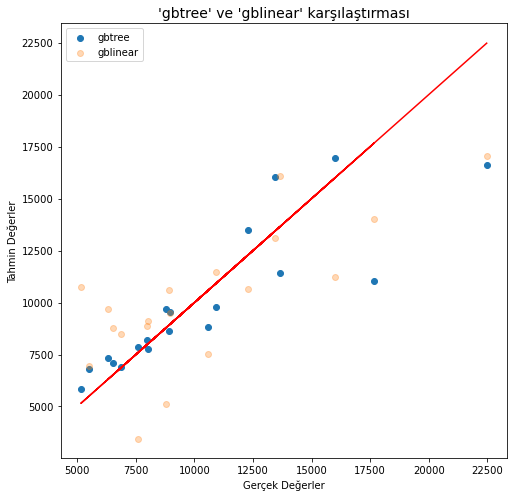

In [136]:
plt.figure(figsize=(8,8))
plt.title("'gbtree' ve 'gblinear' karşılaştırması", size = 14)
ax1 = plt.scatter(y_test, y_tahmin)
ax2 = plt.scatter(y_test, y_tahmin_gblinear, alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

**Let's do cross validation.**

In [137]:
arac_fiyatlari_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror", "max_depth":4}
arac_fiyatlari_cv = xgb.cv(dtrain=arac_fiyatlari_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(arac_fiyatlari_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
30,367.108482,13.284054,1764.468292,260.456482
28,386.879746,11.670690,1764.680298,263.110640
29,377.474190,9.412988,1765.278259,260.030199
27,396.457527,14.602397,1767.291992,261.463544
26,407.020592,14.860677,1769.841339,262.929279


In [138]:
arac_fiyatlari_dmatrix = xgb.DMatrix(data=X, label=y)
params = {"objective":"reg:squarederror", "max_depth":4}
arac_fiyatlari_cv = xgb.cv(dtrain=arac_fiyatlari_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="mae", as_pandas=True, seed=123)
display(arac_fiyatlari_cv.sort_values(by='test-mae-mean').head(5))

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
30,266.022648,11.897844,1200.071411,94.789813
29,275.385391,10.445748,1200.219848,95.212970
28,285.019249,14.443518,1201.467560,95.457563
27,293.797218,15.246081,1202.832275,92.635483
26,302.204979,16.731558,1204.951782,96.132253


**Let's do regularization.**

In [139]:
arac_fiyatlari_dmatrix = xgb.DMatrix(data=X, label=y)
l1_params = np.arange(0.01, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":3}
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=arac_fiyatlari_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [140]:
print("En iyi l1 değerleri:")
en_iyi_degerler = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(en_iyi_degerler.sort_values('rmse').head())

En iyi l1 değerleri:


,l1,rmse
18,0.19,1767.489044
17,0.18,1767.489227
16,0.17,1767.489380
14,0.15,1767.489624
15,0.16,1767.489685


**Let's also learn about MAE values.**

In [141]:
arac_fiyatlari_dmatrix = xgb.DMatrix(data=X, label=y)
l1_params = np.arange(0.01, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":3}
mae_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_mae = xgb.cv(dtrain=arac_fiyatlari_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="mae", as_pandas=True, early_stopping_rounds=10, seed=123)
    mae_l1.append(cv_mae["test-mae-mean"].tail(1).values[0])

In [142]:
print("En iyi l1 değerleri:")
en_iyi_degerler = pd.DataFrame(list(zip(l1_params, mae_l1)), columns=["l1", "mae"])
display(en_iyi_degerler.sort_values('mae').head())

En iyi l1 değerleri:


,l1,mae
12,0.13,1214.444153
6,0.07,1214.444153
16,0.17,1214.444214
11,0.12,1214.444214
9,0.10,1214.444214


**Let's do regularization by changing alpha gamma and lambda values.**

In [143]:
arac_fiyatlari_dmatrix = xgb.DMatrix(data=X, label=y)
l1_params = np.arange(0.01, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":3}
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=arac_fiyatlari_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [144]:
print("En iyi l1 değerleri:")
en_iyi_degerler = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["alpha", "rmse"])
display(en_iyi_degerler.sort_values('rmse').head())

En iyi l1 değerleri:


,alpha,rmse
18,0.19,1767.489044
17,0.18,1767.489227
16,0.17,1767.489380
14,0.15,1767.489624
15,0.16,1767.489685


**Best alpha value is 0.19.**

In [145]:
arac_fiyatlari_dmatrix = xgb.DMatrix(data=X, label=y)
l1_params = np.arange(0.001, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":3}
rmses_l1 = []
for alpha in l1_params:
    params["gamma"] = gamma
    cv_rmse = xgb.cv(dtrain=arac_fiyatlari_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [146]:
print("En iyi gamma değerleri:")
en_iyi_degerler = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["gamma", "rmse"])
display(en_iyi_degerler.sort_values('rmse').head())

En iyi gamma değerleri:


,gamma,rmse
0,0.001,1764.054474
17,0.171,1764.054474
16,0.161,1764.054474
15,0.151,1764.054474
14,0.141,1764.054474


**Best gamma value is 0.001**

In [147]:
import xgboost as xgb
arac_fiyatlari_dmatrix = xgb.DMatrix(data=X, label=y)
l2_params = np.arange(0.001, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":3}
rmses_l2 = []
for mylambda in l2_params:
    params["lambda"] = mylambda
    cv_rmse = xgb.cv(dtrain=arac_fiyatlari_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l2.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [148]:
print("En iyi lambda değerleri:")
en_iyi_degerler = pd.DataFrame(list(zip(l2_params, rmses_l2)), columns=["lambda", "rmse"])
display(en_iyi_degerler.sort_values('rmse').head())

En iyi lambda değerleri:


,lambda,rmse
0,0.001,1666.866363
1,0.011,1670.813324
14,0.141,1699.432251
7,0.071,1706.538239
9,0.091,1727.618164


**Best lambda value is 1666.86**

**We can set hyperparameters with random search.**

In [151]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

In [152]:
xgb_model = XGBRegressor(random_state=30)

grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=15,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_obj_xgb.fit(X_train, y_train,verbose = 1)

y_pred_train = grid_obj_xgb.predict(X_train)
y_pred_test = grid_obj_xgb.predict(X_test)

err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [153]:
print ('Best Parameters: ', grid_obj_xgb.best_params_, ' \n')

Best Parameters:  {'reg_lambda': 5, 'reg_alpha': 1, 'objective': 'reg:squarederror', 'n_estimators': 500, 'min_child_weight': 15, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 3, 'colsample_bytree': 0.9, 'booster': 'gbtree'}  



**Now let's calculate accuracy with these parameters.**

In [154]:
from sklearn.metrics import mean_squared_error as MSE

rmse_test = MSE(y_test, y_pred_test)**(1/2)
print("RMSE değeri: {:.2f}".format(rmse_test))

RMSE değeri: 1971.60


In [155]:
errors = abs(y_pred_test - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 1394.96
Accuracy: 87.229 %.


**Accuracy score is 87.23%.**

## Light GBM

In [163]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [189]:
import lightgbm as lgb

import warnings
warnings.filterwarnings("once")

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])
gbm.save_model('model.txt')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

rmse_test = mean_squared_error(y_test, y_pred) ** 0.5
print(f'The RMSE of prediction is: {rmse_test}')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [190]:
predictions = gbm.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 3), '%.')

Mean Absolute Error: 2138.3
Accuracy: 77.151 %.


C:\Users\seyma\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## When we examined all the models, when we did a random search in Random Forest, the accuracy value was 91.945%, Mean Absolute Error: 867.14, RMSE value (Random Forest): 1303.69. This was the best model we got. That's why we choose this.